In [2]:
#loading the libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
import matplotlib.image as mpimg
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(100, 100, 3)


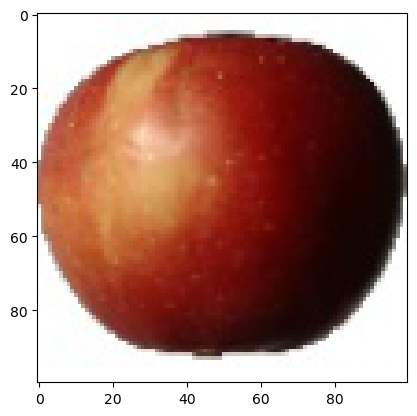

In [3]:
# sample image

img = mpimg.imread(r'fruits-360_dataset\fruits-360\Test\Apple Braeburn\6_100.jpg')
print(img.shape)
plt.imshow(img)

In [4]:
# Information about train and test data

# Define the paths for training and test datasets
train_dir = r"C:\Users\ASUS\Desktop\image classification fruits\fruits-360_dataset\fruits-360\Training"
test_dir = r"C:\Users\ASUS\Desktop\image classification fruits\fruits-360_dataset\fruits-360\Test"

# Initialize lists to store categories and sample counts
train_categories = []
train_samples = []
for i in os.listdir(train_dir):
    train_categories.append(i)
    train_samples.append(len(os.listdir(os.path.join(train_dir, i))))

test_categories = []
test_samples = []
for i in os.listdir(test_dir):
    test_categories.append(i)
    test_samples.append(len(os.listdir(os.path.join(test_dir, i))))

# Print the counts
print("Count of Fruits in Training set:", sum(train_samples))
print("Count of Fruits in Test set:", sum(test_samples))


Count of Fruits in Training set: 67692
Count of Fruits in Test set: 22688


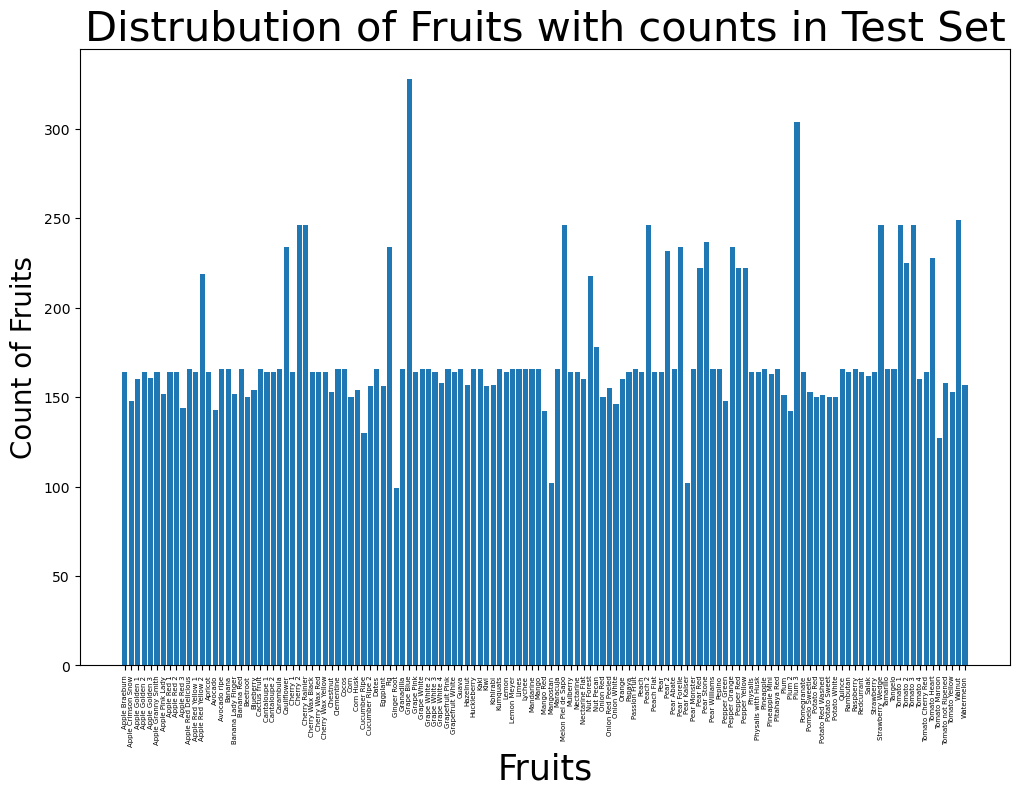

In [8]:
# Distrubution of Fruits with counts in Test Set

index2 = np.arange(len(test_categories))
plt.figure(figsize=(12, 8))
plt.bar(index2, test_samples)
plt.xlabel('Fruits', fontsize=25)
plt.ylabel('Count of Fruits', fontsize=20)
plt.xticks(index2, test_categories, fontsize=5, rotation=90)
plt.title('Distrubution of Fruits with counts in Test Set', fontsize=30)
plt.show()

In [5]:
# Loading the data and Spliting the dataset into training and testing with label names

# Define the paths for training and test datasets
train_dir = r"C:\Users\ASUS\Desktop\image classification fruits\fruits-360_dataset\fruits-360\Training"
test_dir = r"C:\Users\ASUS\Desktop\image classification fruits\fruits-360_dataset\fruits-360\Test"

def load_dataset(data_path):
    # Load the dataset using sklearn's load_files
    data_loading = load_files(data_path, shuffle=False)
    files_add = np.array(data_loading['filenames'])
    targets_fruits = np.array(data_loading['target'])
    target_labels_fruits = np.array(data_loading['target_names'])
    return files_add, targets_fruits, target_labels_fruits

# Load the training and test datasets
x_train, y_train, target_labels = load_dataset(train_dir)
x_test, y_test, _ = load_dataset(test_dir)

# Print some information about the loaded datasets
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))
print("Target labels:", target_labels)


Number of training samples: 67692
Number of test samples: 22688
Target labels: ['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Man

In [6]:
# Classes of fruits
no_of_classes = len(np.unique(y_train))
no_of_classes

131

In [7]:
# Vector of the ytrain first record

y_train = to_categorical(y_train,no_of_classes)
y_test = to_categorical(y_test,no_of_classes)
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# to divide the validation set into test and validation set

x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (15688,)
Test y :  (15688, 131)


In [9]:
# Data Preprocessing

def convert_image_to_array_form(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file)))
    return images_array

x_train = np.array(convert_image_to_array_form(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array_form(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array_form(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [10]:
# Features scalling from 0-255 to 0-1

x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [11]:
# Implementing Tensorflow based model for training 

def tensorflow_based_model():
    model = Sequential() #step 1
    model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same')) #step2
    model.add(Activation('relu'))  # step3
    model.add(MaxPooling2D(pool_size=2)) #step4
    model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 32
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same')) #repeating step 2 and step3 but with more filters of 64
    model.add(MaxPooling2D(pool_size=2)) #repeating step 4 again
    model.add(Dropout(0.3)) # step5
    model.add(Flatten()) #step 6
    model.add(Dense(150)) #step 7
    model.add(Activation('relu')) # setp 3
    model.add(Dropout(0.4)) # step 5
    model.add(Dense(131,activation = 'softmax')) # setp3 and step7. but this time, we are using activation function as softmax (if we train on two classes then we set sigmoid)
    return model #function returning the value when we call it

In [12]:
# Model compilation

model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Training the model with parameter tuning

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_vaild),
        verbose=2, shuffle=True)

Epoch 1/10
2116/2116 - 52s - 25ms/step - accuracy: 0.7051 - loss: 1.0910 - val_accuracy: 0.7677 - val_loss: 0.9977
Epoch 2/10
2116/2116 - 41s - 19ms/step - accuracy: 0.9504 - loss: 0.1521 - val_accuracy: 0.9511 - val_loss: 0.2508
Epoch 3/10
2116/2116 - 40s - 19ms/step - accuracy: 0.9688 - loss: 0.0952 - val_accuracy: 0.9561 - val_loss: 0.2653
Epoch 4/10
2116/2116 - 40s - 19ms/step - accuracy: 0.9777 - loss: 0.0748 - val_accuracy: 0.9711 - val_loss: 0.2000
Epoch 5/10
2116/2116 - 40s - 19ms/step - accuracy: 0.9808 - loss: 0.0627 - val_accuracy: 0.9624 - val_loss: 0.2768
Epoch 6/10
2116/2116 - 40s - 19ms/step - accuracy: 0.9831 - loss: 0.0567 - val_accuracy: 0.9603 - val_loss: 0.2823
Epoch 7/10
2116/2116 - 40s - 19ms/step - accuracy: 0.9845 - loss: 0.0535 - val_accuracy: 0.9657 - val_loss: 0.2219
Epoch 8/10
2116/2116 - 41s - 19ms/step - accuracy: 0.9868 - loss: 0.0470 - val_accuracy: 0.9759 - val_loss: 0.2631
Epoch 9/10
2116/2116 - 40s - 19ms/step - accuracy: 0.9870 - loss: 0.0484 - val_a

In [14]:
# Accuracy score on the test data

acc_score = model.evaluate(x_test, y_test) #we are starting to test the model here
print('\n', 'Test accuracy:', acc_score[1])

491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9903 - loss: 0.0504

 Test accuracy: 0.9860402941703796


491/491 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


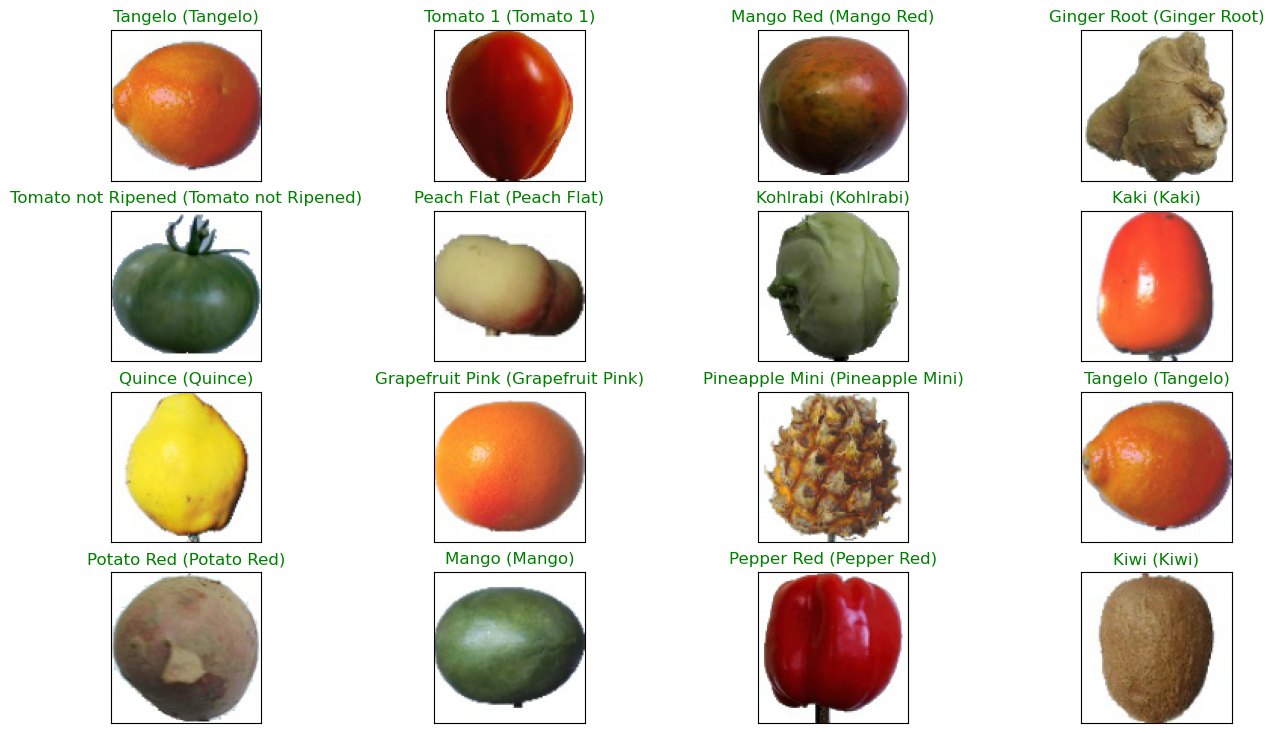

In [15]:
# Visualization with prediction

predictions = model.predict(x_test)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(predictions[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

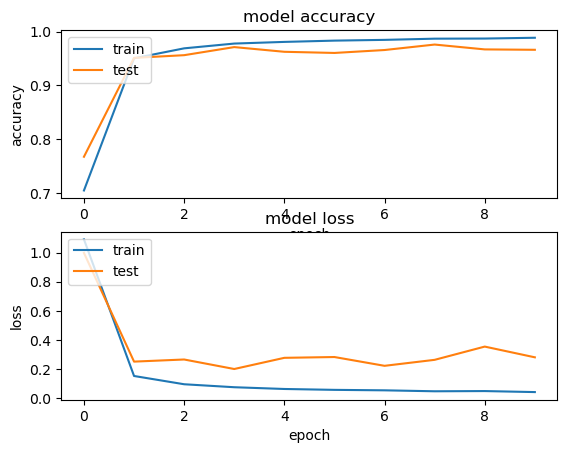

In [18]:
# Visualization the loss and accuracy with respect to epochs

plt.figure(1)  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

#  Test accuracy is: 0.9860402941703796
